# Excited states

For the analysis of the excited states, it is common to simply study the molecular orbitals of the final states, and base assignments and other conclusions from this. This often works quite well, but the final state can be multi-determinational in nature, and the canonical orbitals of larger systems are often quite delocalized and hard to study. As such, many other analysis tools have been developed, two of which will be discussed here:
- [Natural transition orbitals](sec:vis_ntos) (NTOs), which constructs a compact, transition-dependent description of specific excitations
- [Attachment and detachment densities](sec:vis_attach_det), which are based on the one-particle density matrix and considers the density change involved in an excitation


As an illustration, we consider the first valence-excited state of water, as calculated using ADC(2):

```python
import gator

water_mol_str = """
O       0.0000000000     0.1187290000     0.0000000000
H      -0.7532010000    -0.4749160000    -0.0000000000
H       0.7532010000    -0.4749160000     0.0000000000
"""

# Construct structure and basis objects
molecule = gator.get_molecule(water_mol_str)
basis = gator.get_molecular_basis(molecule, "6-31G")
```

In [1]:
import py3Dmol as p3d

water_xyz = """3

O       0.0000000000     0.1187290000     0.0000000000
H      -0.7532010000    -0.4749160000    -0.0000000000
H       0.7532010000    -0.4749160000     0.0000000000
"""

viewer = p3d.view(width=300, height=200)
viewer.addModel(water_xyz, 'xyz')
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick":{},"sphere": {"scale":0.25}})
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

```python
# Perform SCF calculation
scf_gs = gator.run_scf(molecule, basis)

# Calculate the 2 lowest eigenstates
adc_results = gator.run_adc(molecule, basis, scf_gs, method="adc2", singlets=2)
```

Printing the results:

```python
# Print results
print(adc_state.describe())

# Print dominant amplitudes
print(adc_state.describe_amplitudes())
```

In [2]:
print_results = """+--------------------------------------------------------------+
| adc2                                    singlet ,  converged |
+--------------------------------------------------------------+
|  #        excitation energy     osc str    |v1|^2    |v2|^2  |
|          (au)           (eV)                                 |
|  0     0.3054352      8.311314   0.0142    0.9591   0.04089  |
|  1     0.3903211      10.62118   0.0000    0.9636   0.03637  |
+--------------------------------------------------------------+

+---------------------------------------------------+
| State   0 ,     0.3054352 au,      8.311314 eV    |
+---------------------------------------------------+
| HOMO          -> LUMO           a ->a      -0.691 |
| HOMO          -> LUMO+4         a ->a     +0.0451 |
| HOMO          -> LUMO+7         a ->a     +0.0227 |
| HOMO-2 HOMO   -> LUMO+1 LUMO    ab->ab    +0.0306 |
| HOMO   HOMO   -> LUMO   LUMO+3  ab->ab    -0.0253 |
| HOMO-2 HOMO   -> LUMO   LUMO+1  aa->aa    -0.0191 |
| HOMO-1 HOMO   -> LUMO   LUMO    ab->ab    -0.0191 |
| HOMO-3 HOMO   -> LUMO   LUMO    ab->ab    +0.0182 |
| HOMO-1 HOMO   -> LUMO   LUMO+4  aa->aa    -0.0174 |
| HOMO-1 HOMO   -> LUMO+4 LUMO    ab->ab    +0.0152 |
| HOMO-2 HOMO   -> LUMO+6 LUMO    ab->ab    -0.0152 |
| HOMO-1 HOMO   -> LUMO+5 LUMO    ab->ab    -0.0147 |
| HOMO-2 HOMO   -> LUMO   LUMO+6  aa->aa    +0.0139 |
| HOMO-1 HOMO   -> LUMO   LUMO+5  aa->aa    +0.0117 |
| HOMO-2 HOMO   -> LUMO   LUMO+1  ab->ab    +0.0115 |
| HOMO-3 HOMO   -> LUMO   LUMO+7  aa->aa    +0.0107 |

+---------------------------------------------------+
| State   1 ,     0.3903211 au,      10.62118 eV    |
+---------------------------------------------------+
| HOMO          -> LUMO+1         a ->a       +0.69 |
| HOMO          -> LUMO+6         a ->a     -0.0598 |
| HOMO          -> LUMO+2         a ->a     -0.0431 |
| HOMO-2 HOMO   -> LUMO+1 LUMO+1  ab->ab    -0.0301 |
| HOMO   HOMO   -> LUMO+1 LUMO+3  ab->ab    +0.0234 |
| HOMO-1 HOMO   -> LUMO   LUMO+1  ab->ab     +0.019 |
| HOMO-2 HOMO   -> LUMO+1 LUMO+6  aa->aa    -0.0189 |
| HOMO-1 HOMO   -> LUMO+4 LUMO+1  ab->ab    -0.0144 |
| HOMO-3 HOMO   -> LUMO   LUMO+1  ab->ab    -0.0143 |
| HOMO-1 HOMO   -> LUMO+1 LUMO+4  aa->aa    +0.0133 |
| HOMO-2 HOMO   -> LUMO+6 LUMO+1  ab->ab     +0.013 |
| HOMO-1 HOMO   -> LUMO+5 LUMO+1  ab->ab    +0.0121 |
| HOMO-1 HOMO   -> LUMO+1 LUMO+5  aa->aa    -0.0109 |
| HOMO-1 HOMO   -> LUMO   LUMO+1  aa->aa    +0.0104 |"""
print(print_results)

+--------------------------------------------------------------+
| adc2                                    singlet ,  converged |
+--------------------------------------------------------------+
|  #        excitation energy     osc str    |v1|^2    |v2|^2  |
|          (au)           (eV)                                 |
|  0     0.3054352      8.311314   0.0142    0.9591   0.04089  |
|  1     0.3903211      10.62118   0.0000    0.9636   0.03637  |
+--------------------------------------------------------------+

+---------------------------------------------------+
| State   0 ,     0.3054352 au,      8.311314 eV    |
+---------------------------------------------------+
| HOMO          -> LUMO           a ->a      -0.691 |
| HOMO          -> LUMO+4         a ->a     +0.0451 |
| HOMO          -> LUMO+7         a ->a     +0.0227 |
| HOMO-2 HOMO   -> LUMO+1 LUMO    ab->ab    +0.0306 |
| HOMO   HOMO   -> LUMO   LUMO+3  ab->ab    -0.0253 |
| HOMO-2 HOMO   -> LUMO   LUMO+1  aa->aa    -0.

Here we print the basic description of the excited states (energy, intensity, weight of double excitation amplitudes), as well as a break-down of the dominating amplitudes for each transition. From this we can start analysing the excited state by looking at the canonical MOs, but we will now use the results for a more involved analysis.


(sec:vis_ntos)=
## Natural transition orbitals

[Natural transition orbitals](https://aip.scitation.org/doi/pdf/10.1063/1.1558471) (NTOs) are constructed to provide the most compact, transition-dependent transition orbitals of a specific excitation. With this, a single pair of NTOs corresponding to the hole and electron will typically dominate, and will thus provide a easily interpretable description of the excitation. For a pure HOMO to LUMO transition the NTOs would be the same as the HOMO (hole) and LUMO (electron) orbitals.

The NTOs are constructed from a singular-value decomposition (SVD) of the transition density matrix ($\mathbf{T}$):

$$
\mathbf{UTV}^{\dagger} = \mathbf{\Lambda}
$$

where $\mathbf{U}$ and $\mathbf{V}$ are the transformation matrices correspoding to the hole and electron, respectively, and $\mathbf{\Lambda}$ is a diagonal matrix measuring the relative importance of each pair of NTOs.

The first pair of NTOs for the first excitation can now be constructed as:

```{note}
The following scripts are not executed, and static image are instead loaded. This is merely for improved loading time of the webpage and to save disk space.
```

```python
i = 0 # first state only

# Load transition density matrix, combine alpha and beta, and transform to numpy
tdm_ao = adc_state.transition_dm[i].to_ao_basis()
p_tdm_tot = (tdm_ao[0] + tdm_ao[1]).to_ndarray()

# Build NTOs by singular value decomposition
u, s, v = np.linalg.svd(p_tdm_tot)

print('Dominant NTO of state {}'.format(i+1))
print('Relative importance:',np.around(s[0]/sum(s),3))
k = 0 # only look at dominant NTO pair  

# Initial
tools.cubegen.orbital(mol=mol, coeff=v[k],outfile="../../img/visualize/water_nto_{}_HONTO+{}.cube".format(i,k))
# Final
tools.cubegen.orbital(mol=mol, coeff=u.T[k],outfile="../../img/visualize/water_nto_{}_LUNTO+{}.cube".format(i,k))
```

In [20]:
print_results = """
Dominant NTO of state 1
Relative importance: 0.97
"""
print(print_results)


Dominant NTO of state 1
Relative importance: 0.97



```{figure} ../../img/visualize/water-ntos-dens.png
---
name: water-ntos-dens
```

This shows a strong dominance (0.97) of the first NTO pair.

### Interactive visualization of NTOs 

Through the Orbital Viewer, VeloxChem also provides a way to visualize NTOs interactively.

In [22]:
import veloxchem as vlx

water_mol_str = """
O       0.0000000000     0.1187290000     0.0000000000
H      -0.7532010000    -0.4749160000    -0.0000000000
H       0.7532010000    -0.4749160000     0.0000000000
"""

# Construct structure and basis objects
molecule = vlx.Molecule.read_str(water_mol_str)
basis = vlx.MolecularBasis.read(molecule, "6-31G")

# SCF settings and calculation
scf_drv = vlx.ScfRestrictedDriver()
scf_settings = {"conv_thresh": 1.0e-6}
method_settings = {"xcfun": "b3lyp"}
scf_drv.update_settings(scf_settings, method_settings)
scf_results = scf_drv.compute(molecule, basis)

# resolve four eigenstates
rpa_solver = vlx.lreigensolver.LinearResponseEigenSolver()
rpa_solver.update_settings({"nstates": 2}, method_settings)
rpa_solver.nto = True
rpa_solver.nto_cubes = False
rpa_results = rpa_solver.compute(molecule, basis, scf_results)

* Info * Reading basis set from file: /home/emi/miniconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/6-31G  
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: 6-31G                                                                               
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

In [23]:
viewer = vlx.OrbitalViewer()
viewer.plot(molecule, basis, rpa_results["nto_h5_files"][0])

Output()

Dropdown(description='Orbital:', index=4, options=(('  1 occ=-0.000 ene=0.000', 0), ('  2 occ=-0.000 ene=0.000…

(sec:vis_attach_det)=
## Attachment and detachment densities

A different method for visualizing the transitions is to consider the attachment (A) and detachment (D) densities, which are constructed to show the density change related to an excitation {cite}`adanalysis1995, visualform2014, visualappl2014`. For a simple HOMO-LUMO transition they would simply correspond to the square of the dominant NTOs, with meaning:

- Hole/detachment density representing where electrons go from
- Electron/attachment density representing where electrons go to

These densities can then be used to look at properties such as hole and electron size, distance between the centroid (and thus level of charge-transfer), and more. D/A densities are constructed from the one-particle difference density matrix (1DDM), which is simply the difference between the one-particle density matrices of the initial and final state:

$$
\rho_{\Delta} = \rho_f - \rho_i
$$

The sum of the attachment and detachment densities is then the difference density.


Diagonalizing 1DDM

$$
\mathbf{U} \rho_{\Delta} \mathbf{U}^{\dagger} = \delta
$$

The attachment and detachment densities are constructed by considering the negative and positive eigenvalues, and the trace of either is the number of electron involved in the excitation.

Looking at the attachment and detachment density of the first excited state:

```python
# Load transition density matrix, combine alpha and beta, and transform to numpy
p_state = adc_state.state_diffdm[i].to_ao_basis()
p_state_ao = (p_state[0] + p_state[1]).to_ndarray()

# Diagonalize the 1DDM
k, w = np.linalg.eigh(p_state_ao)
k_detach = k.copy()
k_attach = k.copy()
# Detachment: set positive eigenvalues to 0
k_detach[k > 0] = 0
# Attachment: set negative eigenvalues to 0
k_attach[k < 0] = 0
# Back-transform with numpy
detach_ao = w @ np.diag(k_detach) @ w.T
attach_ao = w @ np.diag(k_attach) @ w.T

# Write cube-files
de = tools.cubegen.density(
    mol, dm=detach_ao, outfile="../../img/visualize/water_detachment_{}.cube".format(i)
)
at = tools.cubegen.density(
    mol, dm=attach_ao, outfile="../../img/visualize/water_attachment_{}.cube".format(i)
)
```

```{figure} ../../img/visualize/water-att-det-dens.png
---
name: water-att-det-dens
```

We see that these states are more compact (as we are looking on *densities*) than above NTOs. For a discussion on NTOs and D/A densities, see, *e.g.*, [this paper](https://onlinelibrary.wiley.com/doi/10.1002/jcc.23975).

(sec:vis_analysis_detach_attach)=
## Visual analysis of electronic transitions

The attachment and detachment densities (as well as other density types such as transition, electron, or hole densities) can be further analyzed quantitatively to determine electron localization and transfer between different parts of a molecular system. This is achieved by fragmenting the system into (chemically relevant) subgroups and performing a geometric segmentation of the selected density over these subgroups (using Voronoi segmentation). Charge transfer between molecular fragments can then be calculated. This is achieved by a constrained optimization algorithm since the problem does not have a unique solution. See the complete formulation [here](https://onlinelibrary.wiley.com/doi/10.1111/cgf.14307).

To illustrate this quantitative analysis method, we will analyze the nature of the excited states of the ethene (E) - tetrafluoroethene (TFE) dimer discussed [previously](subsec:tddft-ct). This dimer has been used to illustrate the failures of TDDFT in the description of charge transfer (CT) states (see [this article](https://pubs.acs.org/doi/10.1021/cr0505627)).

We start by constructing the dimer from the two monomers.

In [4]:
from valet import transition_analysis_utils as tau
import veloxchem as vlx

# Construct the dimer 
c2h4_xyz = """ 
C        0.6655087212      0.0000000000      0.0000000000                 
C       -0.6655087212      0.0000000000      0.0000000000                 
H        1.2112231877      0.9379948213      0.0000000000                 
H        1.2112231877     -0.9379948213      0.0000000000                 
H       -1.2112231877      0.9379948213      0.0000000000                 
H       -1.2112231877     -0.9379948213      0.0000000000   
"""

c2f4_str = """
C        0.6665934397      0.0000000000      x                 
C       -0.6665934397     -0.0000000000      x                 
F        1.3499511337      1.1743643195      x                 
F        1.3499511337     -1.1743643195      x                 
F       -1.3499511337      1.1743643195      x                
F       -1.3499511337     -1.1743643195      x   
"""

dist = 4 # We will set the inetrmolecular distance to 4 Angstrom
dist_str = "%.10f" % dist

dimer_xyz = "12\n" + c2h4_xyz

for line in c2f4_str.split("\n"):
    new = line.replace('x', dist_str)
    if 'x' in line:
        dimer_xyz += new + "\n" 

molecule = vlx.Molecule.from_xyz_string(dimer_xyz)
basis_label = "6-31G*"
basis = vlx.MolecularBasis.read(molecule, basis_label)

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 8.
* Info * Reading basis set from file: /home/emi/miniconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/6-31G_D_
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: 6-31G*                                                                              
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                      

In [5]:
viewer = p3d.view(width=500, height=300)
viewer.addModel(dimer_xyz, 'xyz')
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick":{},"sphere": {"scale":0.25}})
viewer.rotate(90,'x')
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

```python
# Next, we calculate the excited states at the B3LYP level of theory

method_dict = {'xcfun':'b3lyp'}
scf_dict = {}

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.update_settings(scf_dict={}, method_dict=method_dict)
scf_results = scf_drv.compute(molecule, basis)

# We now run the excited states calculation and save the attachment and 
# detachment densities in cube files
rsp_dict = {'detach_attach':'yes', 'nstates':5, 'filename':'dimer_4A'}
rsp_drv = vlx.lreigensolver.LinearResponseEigenSolver()
rsp_drv.update_settings(rsp_dict=rsp_dict, method_dict=method_dict)
rsp_results = rsp_drv.compute(molecule, basis, scf_results)
```

In [6]:
# Run a much smaller basis set and fewer excited state in the background...
molecule = vlx.Molecule.from_xyz_string(dimer_xyz)
basis_label = "STO-3G"
basis = vlx.MolecularBasis.read(molecule, basis_label)

method_dict = {'xcfun':'b3lyp'}
scf_dict = {}

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.update_settings(scf_dict={}, method_dict=method_dict)
scf_results = scf_drv.compute(molecule, basis)

# We now run the excited states calculation and save the attachment and 
# detachment densities in cube files
rsp_dict = {'detach_attach':'no', 'nstates':2}
rsp_drv = vlx.lreigensolver.LinearResponseEigenSolver()
rsp_drv.update_settings(rsp_dict=rsp_dict, method_dict=method_dict)
rsp_results = rsp_drv.compute(molecule, basis, scf_results)

* Info * Reading basis set from file: /home/emi/miniconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/STO-3G 
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: STO-3G                                                                              
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
                

In [7]:
# Now we can analyze the densities.
# First, we have to define the subgroups. One subgroup will consist of the ethene molecule, while the other will consist of the tetrafluoroethene.
subgroup_name = ["E", "TFE"]
natm = molecule.number_of_atoms()
atom_subgroup_map = [-1] * natm
atom_subgroup_map[:6] = [0] * 6 # The first 6 atoms belong to ethene, subgroup 0
atom_subgroup_map[6:] = [1] * (natm-6) # The next 6 atoms belong to tetrafluoroethene, subgroup 1
print(atom_subgroup_map)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [16]:
def plot_transition_diagram(state_index, file_name, subgroup_name, atom_subgroup_map):

    folder = "../../data/vis/" # Path to where the cube files were saved
    
    density_type_plus = "detach" # or hole
    density_type_minus = "attach" # or electron/particle

    hole_cube = "%s_S%d_%s.cube" % (folder+file_name, state_index, density_type_plus)
    particle_cube = "%s_S%d_%s.cube" % (folder+file_name, state_index, density_type_minus)

    # We have to load the detachment and attachment densities and compute the atomic charges
    transition = tau.load_transition(hole_cube, particle_cube)
    segment_array = tau.compute_atomic_charges([transition])
    
    subgroup_info = tau.SubgroupInfo()

    # Determine subgroup charges
    subgroup_info.set_subgroups(subgroup_name, atom_subgroup_map)
    tau.compute_subgroup_charges(transition, subgroup_info)

    parts = file_name.split('_')
    
    diagram_title = "%s %s, S%d" % (parts[0], parts[1], state_index)

    tau.create_diagram(subgroup_info, title=diagram_title,
                      save_plot=False)

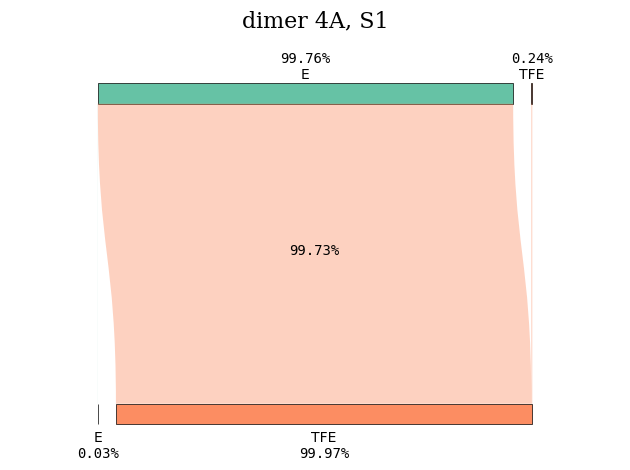

In [17]:
plot_transition_diagram(1, 'dimer_4A', subgroup_name, atom_subgroup_map)

Repeating the same calculation for another intermolecular distance, we can compare what happens to the nature of the excited states. For an intermolecular distance of 10 $\unicode{x212B}$, the first excited state is a local excitation involving the tetrafluoroethene subgroup.

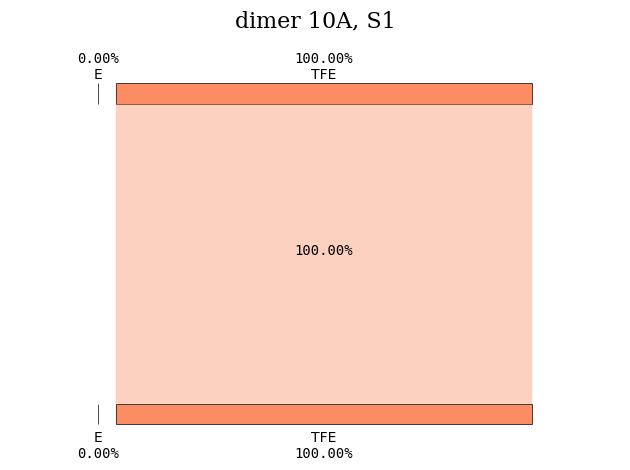

In [18]:
plot_transition_diagram(1, 'dimer_10A', subgroup_name, atom_subgroup_map)

Instead, the first excited state with CT character is S$_2$.

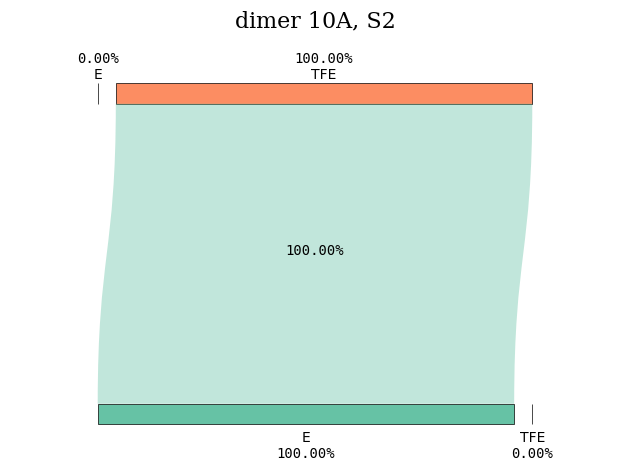

In [19]:
plot_transition_diagram(2, 'dimer_10A', subgroup_name, atom_subgroup_map)